# Fuzzy Utility

**Ecommerce sales data**

This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size and Color, to help optimize product profitability

- Category: Type of product. (String)
- Size: Size of the product. (String)
- Date: Date of the sale. (Date)
- Status: Status of the sale. (String)
- Fulfilment: Method of fulfilment. (String)
- Style: Style of the product. (String)
- SKU: Stock Keeping Unit. (String)
- ASIN: Amazon Standard Identification Number. (String)
- Courier Status: Status of the courier. (String)
- Qty: Quantity of the product. (Integer)
- Amount: Amount of the sale. (Float)
- B2B: Business to business sale. (Boolean)
- Currency: The currency used for the sale. (String)


other:

https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset

https://www.kaggle.com/datasets/thedevastator/online-shopping-consumer-behavior-dataset


In [6]:
# imports section
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../resources/ecommerce-sales/Amazon Sale Report.csv") 
print(df.iloc[1]) # display second row

header_dict = {col: idx for idx, col in enumerate(df.columns)} 
print(header_dict) # 'index': 0

inverted_header_dict = {value: key for key, value in header_dict.items()}
print(inverted_header_dict) # 0: 'index'

index                                                                 1
Order ID                                            171-9198151-1101146
Date                                                           04-30-22
Status                                     Shipped - Delivered to Buyer
Fulfilment                                                     Merchant
Sales Channel                                                 Amazon.in
ship-service-level                                             Standard
Style                                                           JNE3781
SKU                                                     JNE3781-KR-XXXL
Category                                                          kurta
Size                                                                3XL
ASIN                                                         B09K3WFS32
Courier Status                                                  Shipped
Qty                                                             

C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_42636\1223708925.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../resources/ecommerce-sales/Amazon Sale Report.csv")


*Lets try another dataset*

https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset?select=events.csv

timestamp        1433224214164
visitorid               992329
event                     view
itemid                  248676
transactionid              NaN
Name: 1, dtype: object
{'timestamp': 0, 'visitorid': 1, 'event': 2, 'itemid': 3, 'transactionid': 4}
{0: 'timestamp', 1: 'visitorid', 2: 'event', 3: 'itemid', 4: 'transactionid'}
1150086    7757
530559     4328
152963     3024
895999     2474
163561     2410
371606     2345
286616     2252
684514     2246
892013     2024
861299     1991
Name: visitorid, dtype: int64


C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_23644\1768673446.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(visitor_counts[:10])


event      addtocart  transaction  view
visitorid                              
76757            296          185  1402
79627              4            0  1619
152963           371          349  2304
163561           124           92  2194
247235           165          132  1401
286616           120           75  2057
316850            48           20  1684
371606           110           94  2141
518659            84           40  1490
530559           419          286  3623
638482             1            0  1828
684514           231          189  1826
836635           124           90  1720
861299           230          188  1573
892013             1            0  2023
895999            56           50  2368
994820           119           71  1471
1150086          719          559  6479
1161163          131          115  1417
1297062          155          136  1531


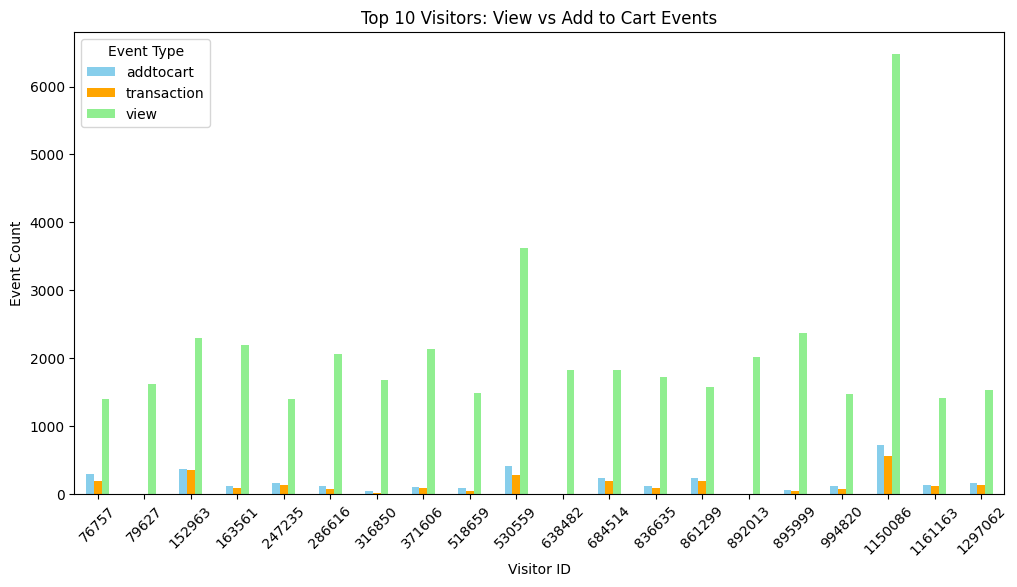

In [9]:
# EDA part

df = pd.read_csv("../resources/retail/events.csv") 
print(df.iloc[1]) # display second row

header_dict = {col: idx for idx, col in enumerate(df.columns)} 
print(header_dict) # 'index': 0

inverted_header_dict = {value: key for key, value in header_dict.items()}
print(inverted_header_dict) # 0: 'index'

visitor_counts = df['visitorid'].value_counts()
print(visitor_counts[:10])

# take top 20 unique users and see, how many views and add_to_cart events they have:
top_visitors = df["visitorid"].value_counts().head(20).index
df_top = df[df["visitorid"].isin(top_visitors)]
event_counts = df_top.groupby(["visitorid", "event"]).size().unstack(fill_value=0)

print(event_counts)

event_counts.plot(kind="bar", figsize=(12, 6), color=["skyblue", "orange", "lightgreen"])
plt.xlabel("Visitor ID")
plt.ylabel("Event Count")
plt.title("Top 10 Visitors: View vs Add to Cart Events")
plt.legend(title="Event Type")
plt.xticks(rotation=45)
plt.show()